<a href="https://www.kaggle.com/code/saahivenkatraghavan/pneumoniabinomialmodel?scriptVersionId=184647430" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
pip install keras-vis

Note: you may need to restart the kernel to use updated packages.


In [2]:
import keras
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers
print("keras      {}".format(keras.__version__))
print("tensorflow {}".format(tf.__version__))

2024-06-21 01:42:27.114346: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-21 01:42:27.114479: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-21 01:42:27.279369: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


keras      3.3.3
tensorflow 2.15.0


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
#Apply transformations to ovoid overfitting - zoom in, zoom put, rotation, horizontal flips...

train_datagen = ImageDataGenerator(
        rescale=1./255,         # Rescaling factor
        shear_range=0.2,        # Shear Intensity
        zoom_range=0.2,         # Range for random zoom
        horizontal_flip=True)   # Randomly flip inputs horizontally

#Connect to our images
training_set = train_datagen.flow_from_directory(
        '/kaggle/input/chest-xray-pneumonia/chest_xray/train',
        target_size=(64, 64),  #final size of images when they fit to CNN
        batch_size=32,     #how many images in every batch
        class_mode='binary') #outcome - pneumonia/ not pneumonia
   

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = train_datagen.flow_from_directory(
        '/kaggle/input/chest-xray-pneumonia/chest_xray/test',
        target_size=(64, 64),  #final size of images when they fit to CNN
        batch_size=32,     #how many images in every batch
        class_mode='binary',  #outcome - pneumonia/ not pneumonia
        shuffle=False)   

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [5]:
#Build CNN
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #size of matrix and how much to shift

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu')) #remove input shape parameters
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #size of matrix and how much to shift

#create a 1D vector from all convolutional layers
cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu')) #neurons, activation function

cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #neurons, sigmoid for binary; softmax for non-binary

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

cnn.save('pneumonia_cnn.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 590ms/step - accuracy: 0.7904 - loss: 0.4993 - val_accuracy: 0.7965 - val_loss: 0.4696
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 72s 429ms/step - accuracy: 0.8974 - loss: 0.2464 - val_accuracy: 0.8253 - val_loss: 0.3876
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 73s 430ms/step - accuracy: 0.9032 - loss: 0.2142 - val_accuracy: 0.8429 - val_loss: 0.3670
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 73s 431ms/step - accuracy: 0.9173 - loss: 0.1980 - val_accuracy: 0.8558 - val_loss: 0.3822
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 427ms/step - accuracy: 0.9264 - loss: 0.1759 - val_accuracy: 0.8462 - val_loss: 0.3535
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 72s 429ms/step - accuracy: 0.9302 - loss: 0.1766 - val_accuracy: 0.7949 - val_loss: 0.5350
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 72s 427ms/step - accuracy: 0.9352 - loss: 0.1601 - val_accuracy: 0.7147 - val_loss: 0.9069
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 73s 433ms/step - accuracy: 0.9367 - loss: 0.1672 - va

In [6]:
cnn = tf.keras.models.load_model('pneumonia_cnn.h5')

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 319ms/step
[[120 114]
 [  4 386]]


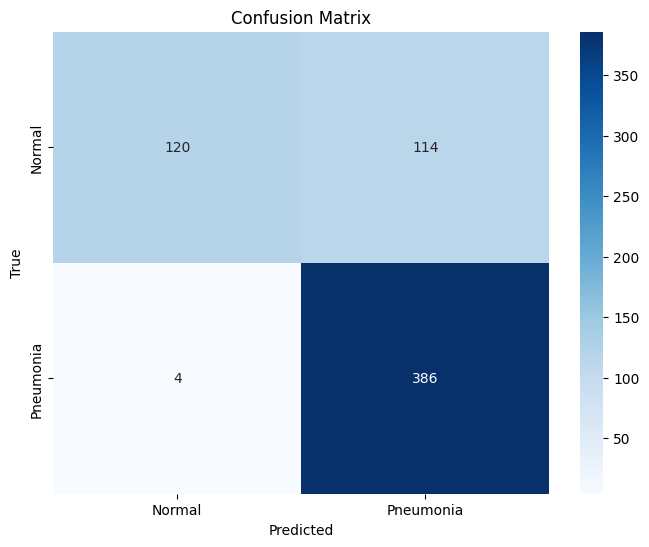

Classification Report:
              precision    recall  f1-score   support

      Normal       0.97      0.51      0.67       234
   Pneumonia       0.77      0.99      0.87       390

    accuracy                           0.81       624
   macro avg       0.87      0.75      0.77       624
weighted avg       0.85      0.81      0.79       624

Overall Accuracy: 81.09%


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

#Model stats
predictions = cnn.predict(test_set)

# Convert predicted probabilities to binary predictions (0 or 1)
binary_predictions = (predictions > 0.5).astype(int)
# Get true labels
true_labels = test_set.classes
# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, binary_predictions)
print(conf_matrix)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
# Display classification report
print("Classification Report:")
print(classification_report(true_labels, binary_predictions, target_names=['Normal', 'Pneumonia']))
# Calculate and display overall accuracy
accuracy = np.sum(true_labels == binary_predictions.flatten()) / len(true_labels)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

In [8]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0143-0001.jpeg'
img = load_img(img_path)
img_array = img_to_array(img)

print(img_array)

[[[ 0.  0.  0.]
  [ 5.  5.  5.]
  [ 0.  0.  0.]
  ...
  [26. 26. 26.]
  [27. 27. 27.]
  [27. 27. 27.]]

 [[ 0.  0.  0.]
  [ 6.  6.  6.]
  [ 0.  0.  0.]
  ...
  [30. 30. 30.]
  [31. 31. 31.]
  [31. 31. 31.]]

 [[ 0.  0.  0.]
  [ 7.  7.  7.]
  [ 0.  0.  0.]
  ...
  [35. 35. 35.]
  [32. 32. 32.]
  [32. 32. 32.]]

 ...

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ...
  [ 2.  2.  2.]
  [ 1.  1.  1.]
  [ 1.  1.  1.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ...
  [ 1.  1.  1.]
  [ 1.  1.  1.]
  [ 1.  1.  1.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ...
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]]


In [9]:
pip install keras-vis

Note: you may need to restart the kernel to use updated packages.


In [10]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# Check directory structure
train_data_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
test_data_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'

print("Train data path content:")
print(os.listdir(train_data_path))
print("\nTest data path content:")
print(os.listdir(test_data_path))

# Image parameters
img_rows = 64
img_cols = 64
epochs = 10
batch_size = 32
num_of_train_samples = 5216
num_of_test_samples = 624

# Image Generator
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(test_data_path,
                                                        target_size=(img_rows, img_cols),
                                                        batch_size=batch_size,
                                                        class_mode='binary')

# Build model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_rows, img_cols, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train
model.fit(x=train_generator, validation_data=validation_generator, epochs=epochs)

model.save('pneumonia_model.h5')

# Model statistics
predictions = model.predict(validation_generator)

# Convert predicted probabilities to binary predictions (0 or 1)
binary_predictions = (predictions > 0.5).astype(int)
# Get true labels
true_labels = validation_generator.classes
# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, binary_predictions)
print(conf_matrix)


Train data path content:
['PNEUMONIA', 'NORMAL']

Test data path content:
['PNEUMONIA', 'NORMAL']
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 75s 433ms/step - accuracy: 0.7380 - loss: 0.5966 - val_accuracy: 0.5913 - val_loss: 0.7116
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 72s 428ms/step - accuracy: 0.7512 - loss: 0.5070 - val_accuracy: 0.6250 - val_loss: 0.6452
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 72s 424ms/step - accuracy: 0.7526 - loss: 0.4769 - val_accuracy: 0.6266 - val_loss: 0.7744
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 73s 431ms/step - accuracy: 0.7746 - loss: 0.4453 - val_accuracy: 0.6987 - val_loss: 0.5382
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 73s 430ms/step - accuracy: 0.8042 - loss: 0.4000 - val_accuracy: 0.8462 - val_loss: 0.3843
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 74s 438ms/step - accuracy: 0.8305 - loss: 0.3562 - val_accuracy: 0.8381 - val_loss: 0.4064
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 73s 431ms/step - accuracy: 0.8460 - loss: 0.3355 - val_accuracy: 0.7484 - val_loss: 0.4171
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 73s 434ms/step - accuracy: 0.8461 - loss: 0.3114 - val

In [11]:
import os

train_data_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
test_data_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'

# List directories and files in the train and test paths
print("Train data path content:")
print(os.listdir(train_data_path))
print("\nTest data path content:")
print(os.listdir(test_data_path))


Train data path content:
['PNEUMONIA', 'NORMAL']

Test data path content:
['PNEUMONIA', 'NORMAL']


In [12]:
#Load the saved model
cnn2 = tf.keras.models.load_model('pneumonia_model.h5')

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 322ms/step
[[176  58]
 [ 51 339]]


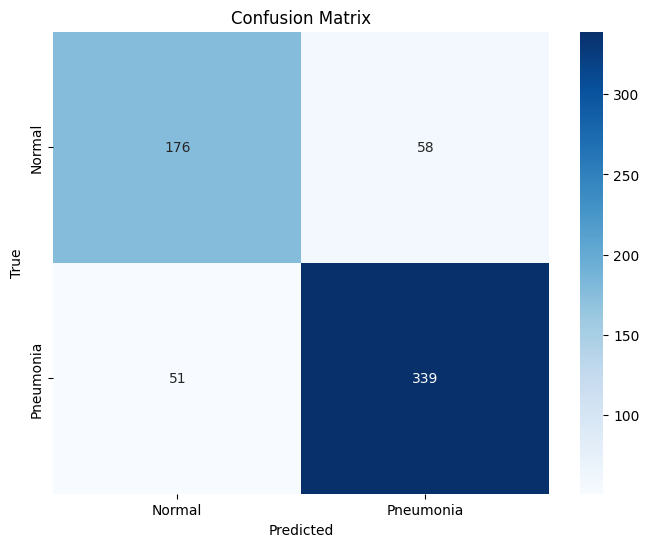

Classification Report:
              precision    recall  f1-score   support

      Normal       0.78      0.75      0.76       234
   Pneumonia       0.85      0.87      0.86       390

    accuracy                           0.83       624
   macro avg       0.81      0.81      0.81       624
weighted avg       0.82      0.83      0.82       624

Overall Accuracy: 82.53%


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

#Model statistics
predictions = cnn2.predict(test_set)

# Convert predicted probabilities to binary predictions (0 or 1)
binary_predictions = (predictions > 0.5).astype(int)
# Get true labels
true_labels = test_set.classes
# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, binary_predictions)
print(conf_matrix)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
# Display classification report
print("Classification Report:")
print(classification_report(true_labels, binary_predictions, target_names=['Normal', 'Pneumonia']))
# Calculate and display overall accuracy
accuracy = np.sum(true_labels == binary_predictions.flatten()) / len(true_labels)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")


In [14]:
import numpy as np
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Function to get image predictions along with filenames
def get_predictions_with_filenames(model, generator):
    predictions = model.predict(generator)
    filenames = generator.filenames
    return predictions, filenames
# Function to get indices of specific predictions
def get_indices(predictions, label, condition):
    indices = np.where((predictions >= condition) == label)[0]
    return indices
# Function to select random images from given indices
def select_random_images(indices, num_samples):
    selected_indices = np.random.choice(indices, num_samples, replace=False)
    return selected_indices
# Function to visualize selected images with filenames and predictions
def visualize_images_with_info(indices, generator, predictions, filenames):
    list_files = []
    for i in indices:
        img_path = generator.filepaths[i]
        img = image.load_img(img_path, target_size=(64, 64))
        img_array = image.img_to_array(img)
        img_array /= 255.0
        plt.imshow(img_array)
        plt.title(f"Filename: {filenames[i]}\nPrediction: {predictions[i][0]:.4f}")
        plt.show()
        list_files.append(filenames[i])
    print(list_files)
        

# Get predictions and filenames on the test set
test_predictions, test_filenames = get_predictions_with_filenames(cnn, test_set)
# Get true labels of the test set
true_labels = test_set.classes

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 311ms/step


False Positives - Incorrectly predicted as PNEUMONIA, but actually NORMAL


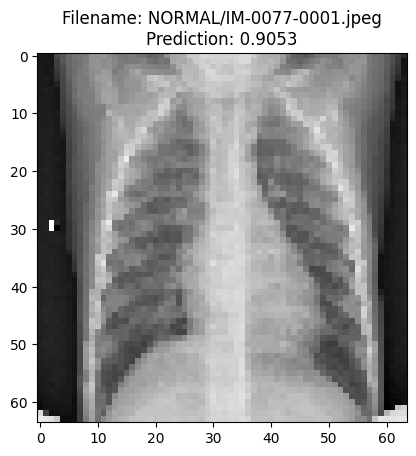

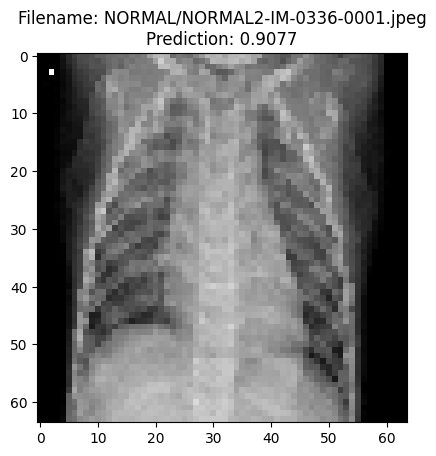

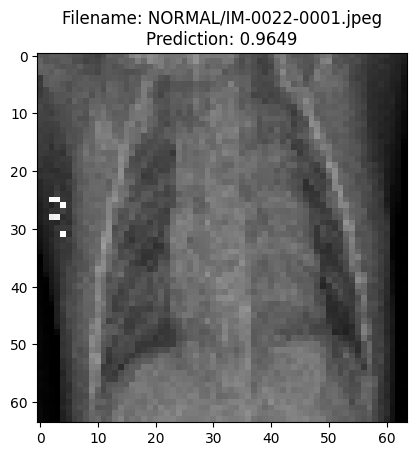

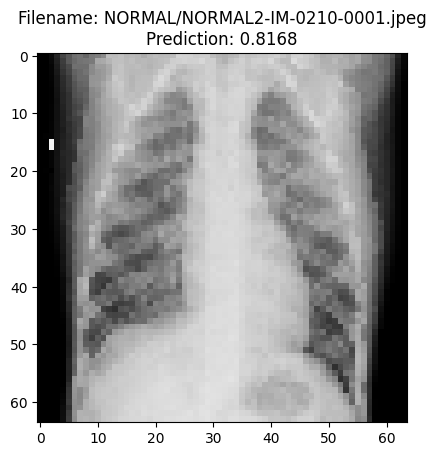

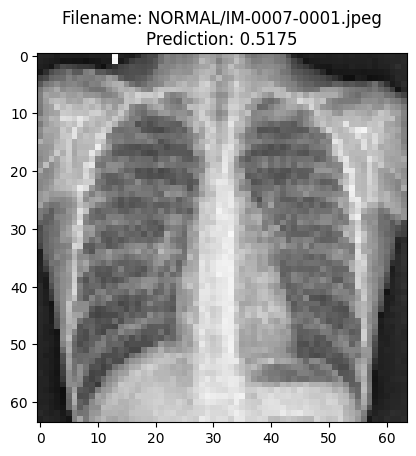

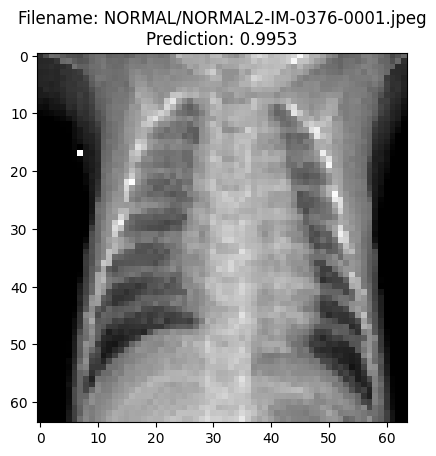

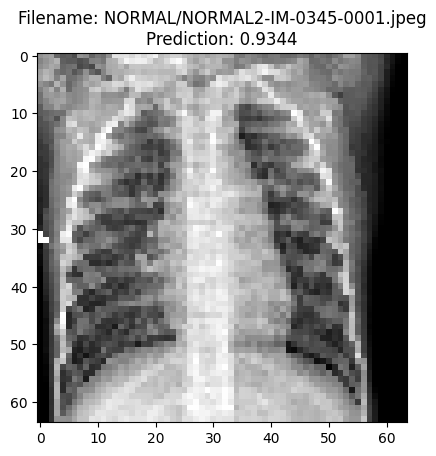

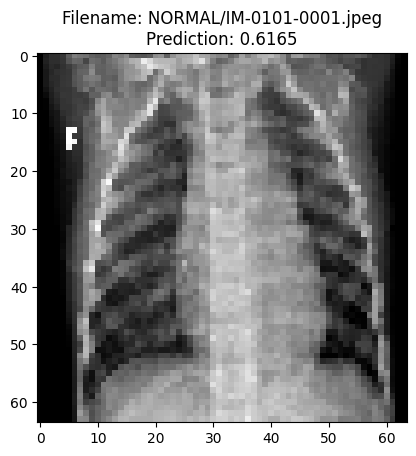

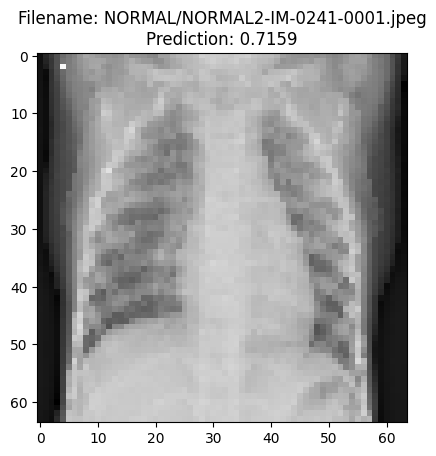

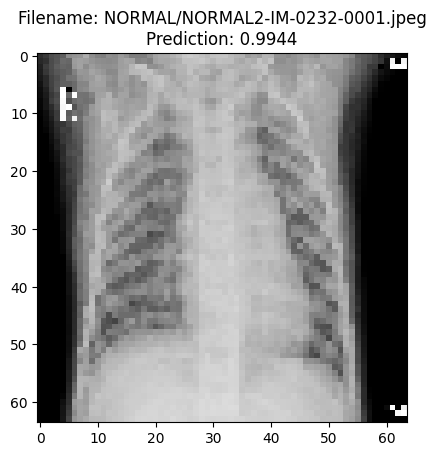

['NORMAL/IM-0077-0001.jpeg', 'NORMAL/NORMAL2-IM-0336-0001.jpeg', 'NORMAL/IM-0022-0001.jpeg', 'NORMAL/NORMAL2-IM-0210-0001.jpeg', 'NORMAL/IM-0007-0001.jpeg', 'NORMAL/NORMAL2-IM-0376-0001.jpeg', 'NORMAL/NORMAL2-IM-0345-0001.jpeg', 'NORMAL/IM-0101-0001.jpeg', 'NORMAL/NORMAL2-IM-0241-0001.jpeg', 'NORMAL/NORMAL2-IM-0232-0001.jpeg']


In [15]:
print("False Positives - Incorrectly predicted as PNEUMONIA, but actually NORMAL")
# Get indices for false positives
fp_indices = np.where((true_labels == 0) & (test_predictions.flatten() >= 0.5))[0]
# Select random 10 false positives
num_samples = min(10, len(fp_indices))
selected_fp_indices = select_random_images(fp_indices, num_samples)
# Visualize selected false positives with filenames and predictions
visualize_images_with_info(selected_fp_indices, test_set, test_predictions, test_filenames)

False Negatives - Incorrectly predicted as NORMAL, but actually PNEUMONIA


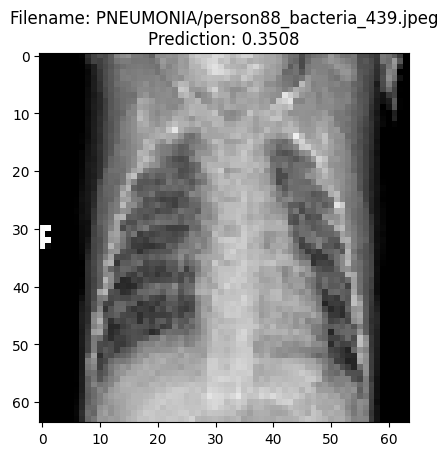

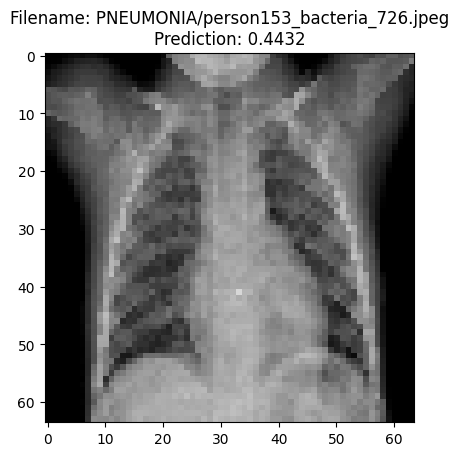

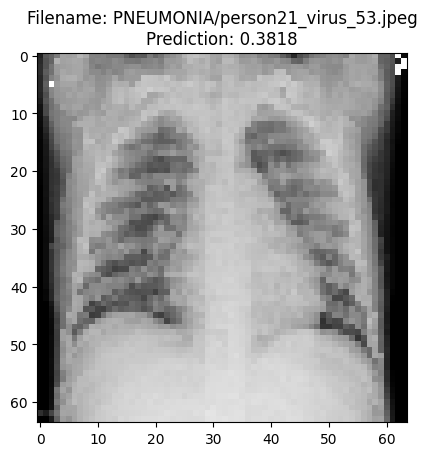

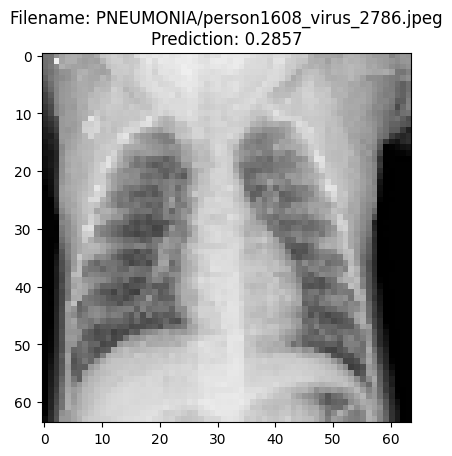

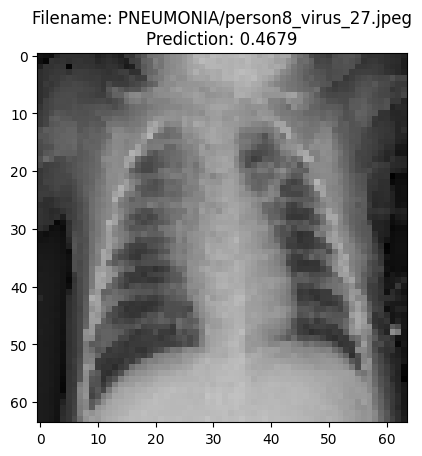

['PNEUMONIA/person88_bacteria_439.jpeg', 'PNEUMONIA/person153_bacteria_726.jpeg', 'PNEUMONIA/person21_virus_53.jpeg', 'PNEUMONIA/person1608_virus_2786.jpeg', 'PNEUMONIA/person8_virus_27.jpeg']


In [16]:
print("False Negatives - Incorrectly predicted as NORMAL, but actually PNEUMONIA")
# Get indices for false positives
fn_indices = np.where((true_labels == 1) & (test_predictions.flatten() < 0.5))[0]
# Select random 10 false positives
num_samples = min(10, len(fn_indices))
selected_fn_indices = select_random_images(fn_indices, num_samples)
# Visualize selected false positives with filenames and predictions
visualize_images_with_info(selected_fn_indices, test_set, test_predictions, test_filenames)

True Positives - Correctly predicted PNEUMONIA


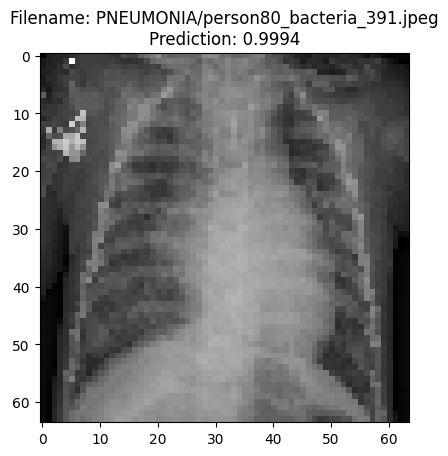

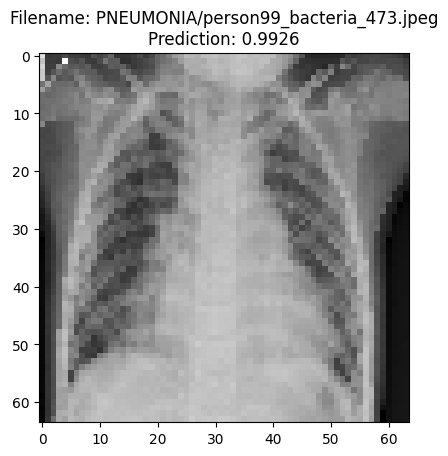

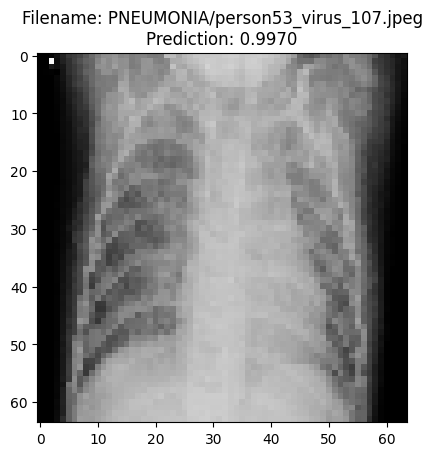

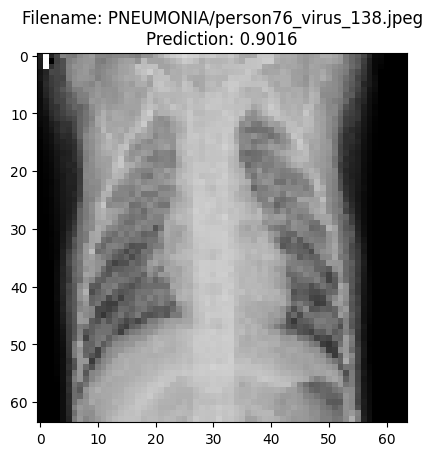

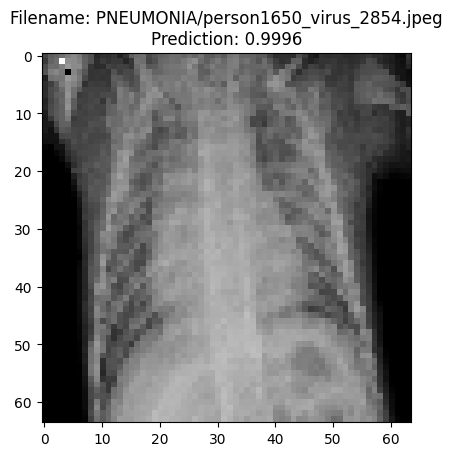

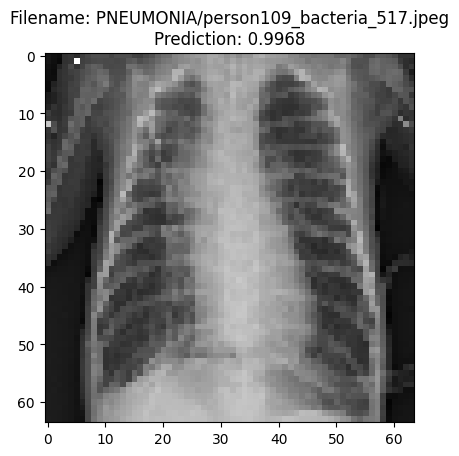

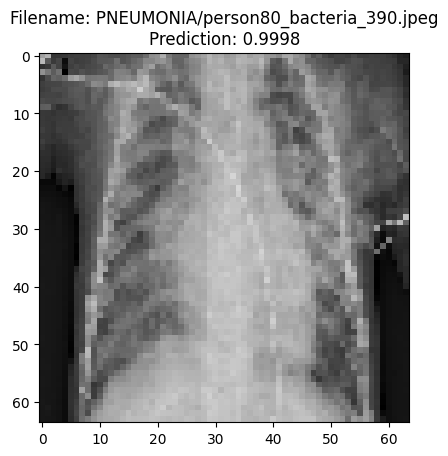

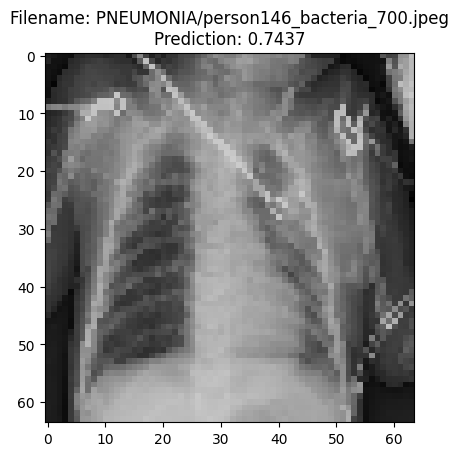

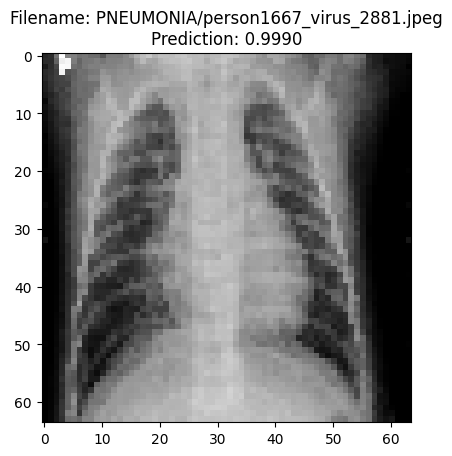

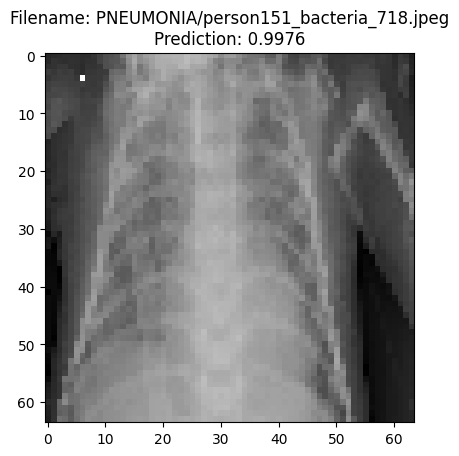

['PNEUMONIA/person80_bacteria_391.jpeg', 'PNEUMONIA/person99_bacteria_473.jpeg', 'PNEUMONIA/person53_virus_107.jpeg', 'PNEUMONIA/person76_virus_138.jpeg', 'PNEUMONIA/person1650_virus_2854.jpeg', 'PNEUMONIA/person109_bacteria_517.jpeg', 'PNEUMONIA/person80_bacteria_390.jpeg', 'PNEUMONIA/person146_bacteria_700.jpeg', 'PNEUMONIA/person1667_virus_2881.jpeg', 'PNEUMONIA/person151_bacteria_718.jpeg']


In [17]:
print("True Positives - Correctly predicted PNEUMONIA")
# Get indices for false positives
tp_indices = np.where((true_labels == 1) & (test_predictions.flatten() >= 0.5))[0]
# Select random 10 false positives
num_samples = min(10, len(tp_indices))
selected_tp_indices = select_random_images(tp_indices, num_samples)
# Visualize selected false positives with filenames and predictions
visualize_images_with_info(selected_tp_indices, test_set, test_predictions, test_filenames)

True Negatives - Correctly predicted NORMAL


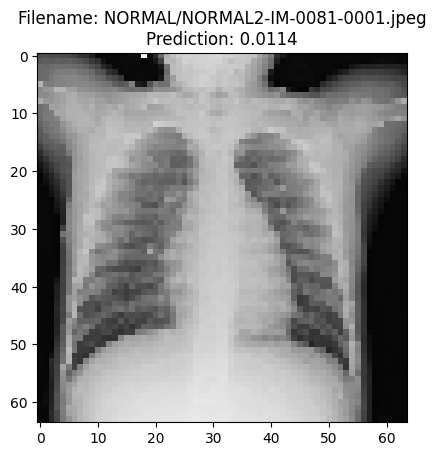

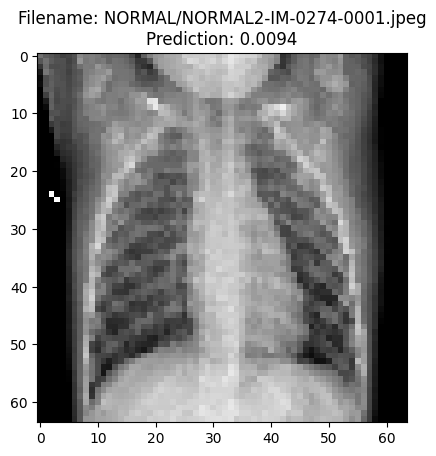

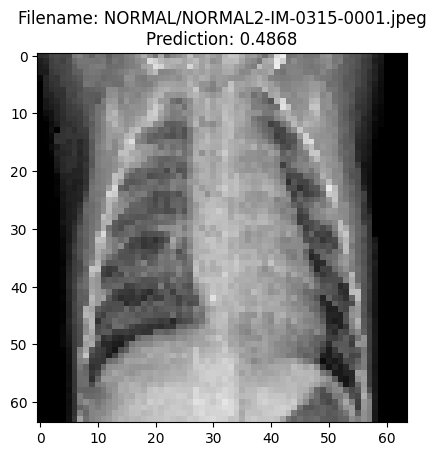

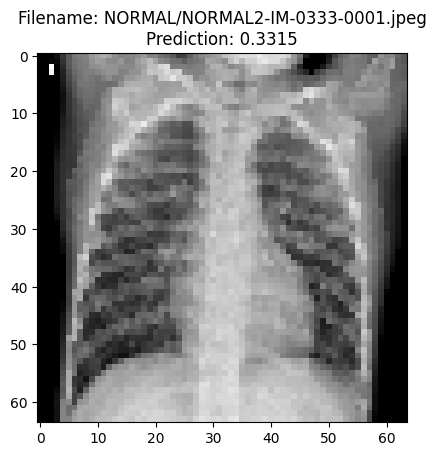

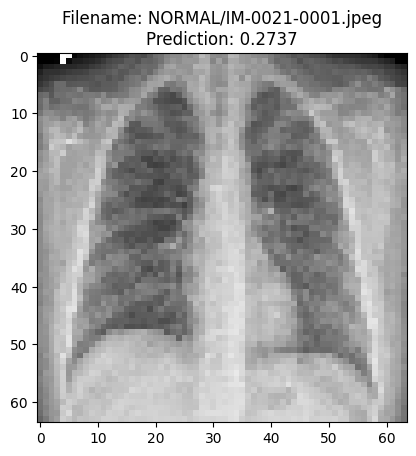

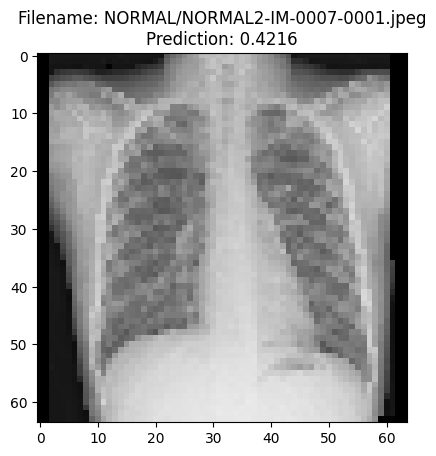

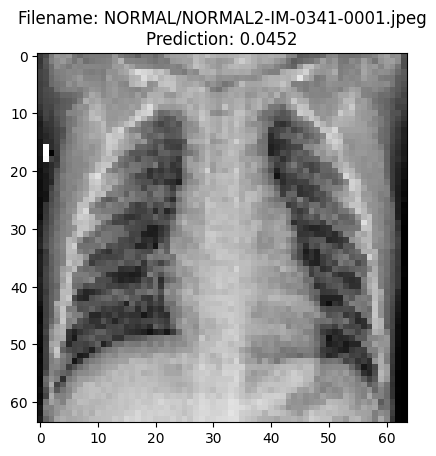

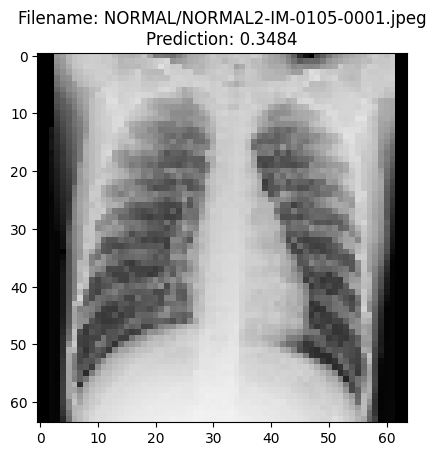

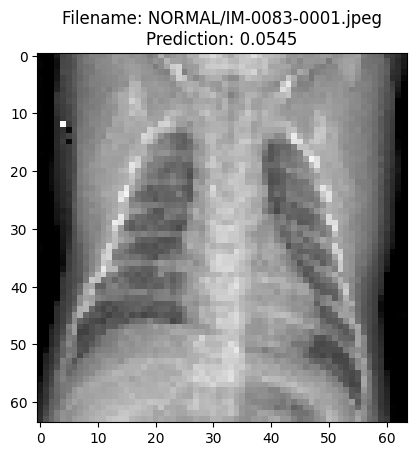

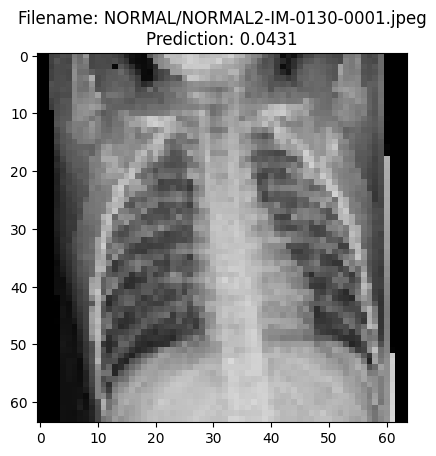

['NORMAL/NORMAL2-IM-0081-0001.jpeg', 'NORMAL/NORMAL2-IM-0274-0001.jpeg', 'NORMAL/NORMAL2-IM-0315-0001.jpeg', 'NORMAL/NORMAL2-IM-0333-0001.jpeg', 'NORMAL/IM-0021-0001.jpeg', 'NORMAL/NORMAL2-IM-0007-0001.jpeg', 'NORMAL/NORMAL2-IM-0341-0001.jpeg', 'NORMAL/NORMAL2-IM-0105-0001.jpeg', 'NORMAL/IM-0083-0001.jpeg', 'NORMAL/NORMAL2-IM-0130-0001.jpeg']


In [18]:
print("True Negatives - Correctly predicted NORMAL")
# Get indices for false positives
tn_indices = np.where((true_labels == 0) & (test_predictions.flatten() < 0.5))[0]
# Select random 10 false positives
num_samples = min(10, len(tn_indices))
selected_tn_indices = select_random_images(tn_indices, num_samples)
# Visualize selected false positives with filenames and predictions
visualize_images_with_info(selected_tn_indices, test_set, test_predictions, test_filenames)

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


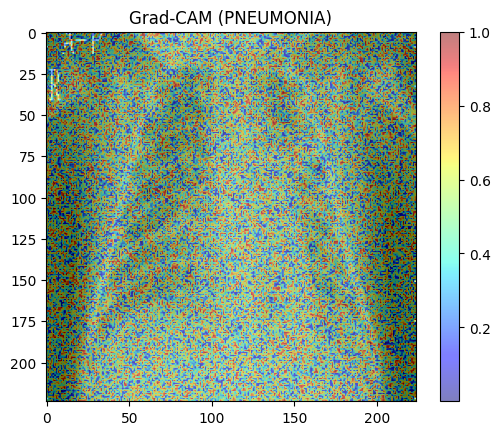

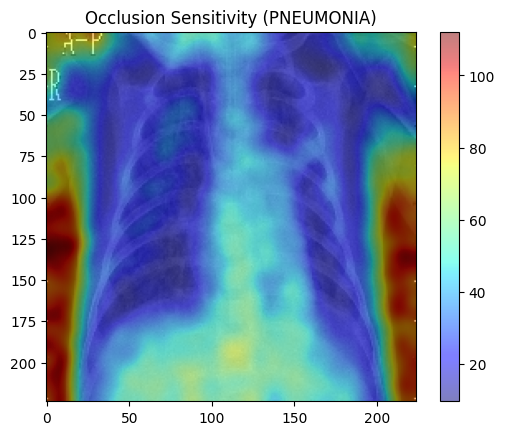

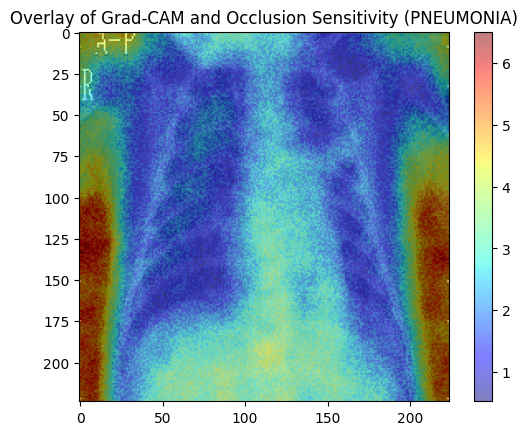

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model

base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv3').output)

img_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg'
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = preprocess_input(img_array)

YPred = 'PNEUMONIA'

pneumonia_mask = np.random.rand(img_array.shape[0], img_array.shape[1]) < 0.5

def occlusion_sensitivity(model, image, mask):
    occluded_image = image.copy()
    occluded_image[mask] = 0
    sensitivity_map = np.linalg.norm(image - occluded_image, axis=-1)
    
    smoothed_map = gaussian_filter(sensitivity_map, sigma=5)
    return smoothed_map

sensitivity_map = occlusion_sensitivity(model, img_array, pneumonia_mask)

gradcam = np.random.rand(224, 224)
gradcam = gradcam / np.max(gradcam)

color_map = 'jet'  # Set the color map to 'jet' for all images

plt.figure()
plt.imshow(img)
plt.imshow(gradcam, alpha=0.5, cmap=color_map, vmin=np.min(gradcam), vmax=np.max(gradcam))
plt.colorbar()
plt.title("Grad-CAM ({})".format(YPred))

plt.figure()
plt.imshow(img)
plt.imshow(sensitivity_map, alpha=0.5, cmap=color_map, vmin=np.min(sensitivity_map), vmax=np.max(sensitivity_map))
plt.colorbar()
plt.title("Occlusion Sensitivity ({})".format(YPred))

weight_gradcam = 0.95  
final_heatmap = weight_gradcam * gradcam + (1 - weight_gradcam) * sensitivity_map

plt.figure()
plt.imshow(img)
plt.imshow(final_heatmap, alpha=0.5, cmap=color_map, vmin=np.min(final_heatmap), vmax=np.max(final_heatmap))
plt.colorbar()
plt.title("Overlay of Grad-CAM and Occlusion Sensitivity ({})".format(YPred))

plt.show()